<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.
**Ответ**
$$\hat y_{t} = \alpha y_t + (1 - \alpha)\hat y_{t-1}$$
При стремлении $\alpha$ к 1 адаптивная способность увеличивается, так как $\hat y_{t} \to y_{t-1}$ и алгоритм придает больший вес последним значениям, аналогично, при уменьшении $\alpha$ к 0 прогноз сильнее приближается к среднему значению, и хуже реагирует на резкие скачки.

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?
**Ответ**

Этот параметр отвечает за сгляживание тренда, здесь, аналогично модели ЭСС, при большом значении $\alpha_2$ прогноз будет с бОльшим коэффициентом учитывать последнее значение, и наоборот, при уменьшении этого параметра, прогноз будет более гладким и не так резко реагирующим на изменения. Поэтому в первом случае нужно брать маленькое значение $\alpha_2$ (тренд меняется плавно, и алгоритм успеет под него подстроится, не реагируя на не относящиеся к тренду скачки), а во втором - большое (тренд меняется, и прогноз должен быстро отлавливать эти изменения).  

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

**Ответ**

Обозначим:
$$ e_t = y_t - s_{t-p} - l_{t-1} - b_{t-1} $$
Тогда:
$ l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) = 
l_{t-1} + b_{t-1} + \alpha (y_t - s_{t-p} - l_{t-1} - b_{t-1}) = 
l_{t-1} + b_{t-1} + \alpha e_t;$

$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} =$ (из предыдущего раветства) $= b_{t-1} + \beta(b_{t-1} + \alpha e_t) - \beta b_{t-1} = b_{t-1} + \alpha\beta e_t;$

$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} = s_{t-p} + \gamma(y_t - l_t - s_{t-p}) = $ (из выражения для $e_t$) $ = s_{t-p} + \gamma(e_t+l_{t-1} +b_{t-1} -l_t) = $ (из выражения для $l_t$) $ = s_{t-p} + \gamma(e_t - \alpha e_t) = s_{t-p} + \gamma(1-\alpha)e_t.$

**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$

**Ответ**

Обозначим:
$$ e_t = y_t - l_{t-1} - \phi b_t$$

Тогда:
$$ l_{t} = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right) = l_{t-1} + \phi b_{t-1} + \alpha (y_t - l_{t-1} - \phi b_{t-1}) = $$
$$l_{t-1} + \phi b_{t-1} + \alpha e_t,$$

$$b_t = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1} = \beta (\phi b_{t-1} + \alpha e_t) + \left(1-\beta\right)\phi b_{t-1} = \phi b_{t-1} + \beta(\phi b_{t-1} + \alpha e_t - \phi b_{t-1}) = \phi b_{t-1} + \beta\alpha e_t$$

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

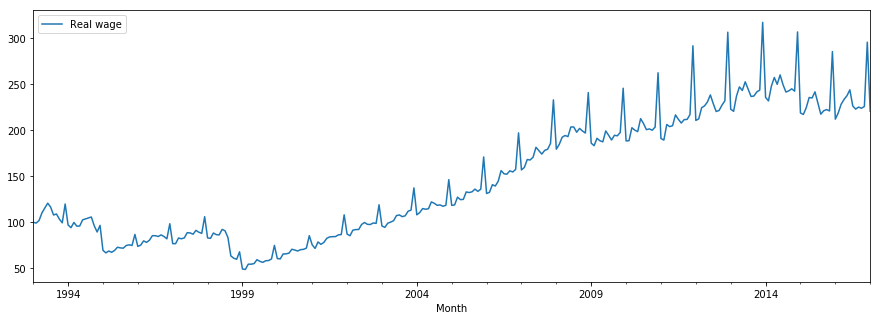

In [12]:
# start with this code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('monthly-wage.csv', sep=';', decimal='.', index_col=0, parse_dates=True, dayfirst=True)
wage.plot(figsize=(15,5))

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 1) Search for the optimal $\alpha$ 

In [13]:
ALPHA = [.9, .7, .5, .4, .35, .2, .15, .1, .05, .01]
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':5} for alpha in ALPHA]
FRC_WAGE = BuildForecast(h=1, ts=wage.loc['1998-09-01':'2017-01-01'], AlgName = 'InitExponentialSmoothing', AlgTitle='IES',ParamsArray = ESParamsArray)

In [14]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE.keys())

ix = wage.loc['1998-09-01':'2015-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.35, 'AdaptationPeriod': 5}    0.055968
IES {'alpha': 0.4, 'AdaptationPeriod': 5}     0.056082
IES {'alpha': 0.5, 'AdaptationPeriod': 5}     0.057288
IES {'alpha': 0.7, 'AdaptationPeriod': 5}     0.060144
IES {'alpha': 0.2, 'AdaptationPeriod': 5}     0.060185
IES {'alpha': 0.9, 'AdaptationPeriod': 5}     0.061551
IES {'alpha': 0.15, 'AdaptationPeriod': 5}    0.066281
IES {'alpha': 0.1, 'AdaptationPeriod': 5}     0.082017
IES {'alpha': 0.05, 'AdaptationPeriod': 5}    0.135854
IES {'alpha': 0.01, 'AdaptationPeriod': 5}    0.402981
dtype: float64

## 2) draw the forecast with optimial value $\alpha $

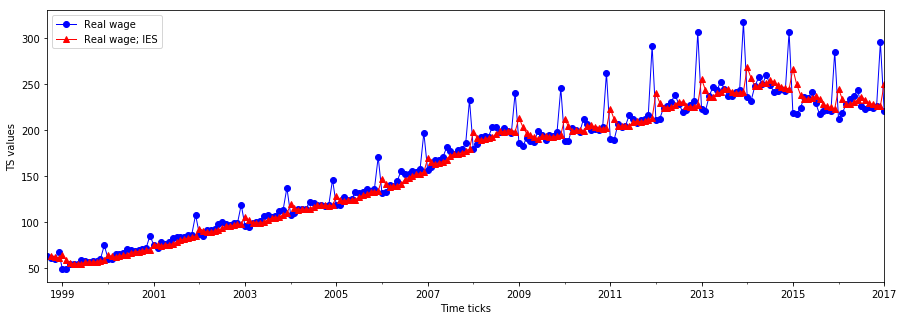

In [15]:
algName = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE[algName].loc['1998-09-01':'2017-01-01']
               , ts_num=0, alg_title='IES')


   На мой взгляд, такой прогноз не очень подходит, так как в данных присутствует сезонность, которую он не отражает.

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [16]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE[algName].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.062077
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

In [133]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter
import math
def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = np.zeros(T)
    
    l= x[0]
    s= x[:p] - x[0]*np.ones(p)
    
    for cntr in np.arange(0,T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0
            
            e_t = x[cntr] - l - s[cntr%p]
            l = l + alpha*e_t
            s[cntr % p] = s[cntr % p] + delta*(1-alpha)*e_t
            
        FORECAST[cntr] = l + s[cntr%p]
    return FORECAST

In [134]:
# Put your code here
ts = wage.loc['1998-09-01':'2015-01-01']
ALPHA = [.9, .7, .5, .4, .35, .2, .15, .1, .05, .01]
DELTA = [.9, .7, .5, .4, .35, .2, .15, .1, .05, .01]
WParams = [{'alpha':alpha, 'delta':delta, 'seasonality_period':12 } for alpha in ALPHA for delta in DELTA]

In [135]:
QualityStr = pd.DataFrame(index = ts.columns, columns =[str(i) for i in WParams])

ix = ts.index

for param_cntr in WParams:
    frc_wage = pd.DataFrame(WintersExponentialSmoothing(ts['Real wage'], 1, param_cntr),\
                            columns = ts.columns, index = ix)
    
    QualityStr[str(param_cntr)],_ = qualityMACAPE(ts, frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

{'alpha': 0.9, 'delta': 0.9, 'seasonality_period': 12}      0.000299
{'alpha': 0.7, 'delta': 0.9, 'seasonality_period': 12}      0.000620
{'alpha': 0.9, 'delta': 0.7, 'seasonality_period': 12}      0.000961
{'alpha': 0.5, 'delta': 0.9, 'seasonality_period': 12}      0.001045
{'alpha': 0.4, 'delta': 0.9, 'seasonality_period': 12}      0.001370
{'alpha': 0.35, 'delta': 0.9, 'seasonality_period': 12}     0.001583
{'alpha': 0.9, 'delta': 0.5, 'seasonality_period': 12}      0.001722
{'alpha': 0.7, 'delta': 0.7, 'seasonality_period': 12}      0.002001
{'alpha': 0.9, 'delta': 0.4, 'seasonality_period': 12}      0.002146
{'alpha': 0.9, 'delta': 0.35, 'seasonality_period': 12}     0.002369
{'alpha': 0.2, 'delta': 0.9, 'seasonality_period': 12}      0.002678
{'alpha': 0.9, 'delta': 0.2, 'seasonality_period': 12}      0.003094
{'alpha': 0.5, 'delta': 0.7, 'seasonality_period': 12}      0.003245
{'alpha': 0.9, 'delta': 0.15, 'seasonality_period': 12}     0.003355
{'alpha': 0.15, 'delta': 0.9, 'sea

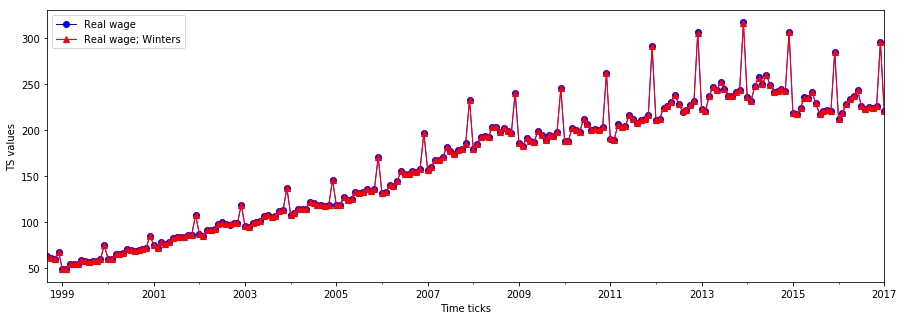

In [136]:
import ast
ts = wage.loc['1998-09-01':'2017-01-01']
params = ast.literal_eval(QualityStr.columns[0])
frc = pd.DataFrame(WintersExponentialSmoothing(ts['Real wage'], 1, params),\
                            columns = [''], index = ts.index)
plotTSForecast(ts, frc, ts_num=0, alg_title='Winters')

In [137]:
frc.columns = ts.columns
qualityMACAPE(ts.loc['2015-02-01':'2017-01-01'], frc.loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.000258
dtype: float64

Ошибка получилась меньше, из этого, а также из рисунка видно, что этот алгоритм хорошо предсказывает данный ряд

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [170]:
def Theil_Wage(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = np.zeros(T)
    
    l = x[0]
    b = 0
    s = np.array([np.NaN for i in range(p)])
    
    for cntr in np.arange(1,T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr] - l - b
            
            e_t = x[cntr] - l - s[cntr%p] - b
            l = l + b + alpha*e_t
            b = b + alpha*beta*e_t
            s[cntr % p] = s[cntr % p] + gamma*(1-alpha)*e_t
            
        FORECAST[cntr] = l + b + s[(cntr)%p]
    return FORECAST

In [171]:
ts = wage.loc['1998-09-01':'2015-01-01']
ALPHA = [.9, .7, .5, .4, .35, .2, .15, .1, .05, .01]
BETA = [.9, .7, .5, .4, .35, .2, .15, .1, .05, .01]
DELTA = [.9, .7, .5, .4, .35, .2, .15, .1, .05, .01]
WParams = [{'alpha':alpha, 'beta': beta, 'gamma':delta, 'seasonality_period':12 } for alpha in ALPHA for delta in DELTA for beta in BETA]


In [172]:
QualityStr = pd.DataFrame(index = ts.columns, columns =[str(i) for i in WParams])

ix = ts.index

for param_cntr in WParams:
    frc_wage = pd.DataFrame(Theil_Wage(ts['Real wage'], 1, param_cntr),\
                            columns = ts.columns, index = ix)
    
    QualityStr[str(param_cntr)],_ = qualityMACAPE(ts, frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

{'alpha': 0.15, 'beta': 0.9, 'gamma': 0.9, 'seasonality_period': 12}      0.001698
{'alpha': 0.15, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}     0.012863
{'alpha': 0.2, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}      0.012882
{'alpha': 0.35, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}     0.013116
{'alpha': 0.4, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}      0.013187
{'alpha': 0.1, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}      0.013224
{'alpha': 0.5, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}      0.013313
{'alpha': 0.7, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}      0.013456
{'alpha': 0.9, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}      0.013541
{'alpha': 0.9, 'beta': 0.01, 'gamma': 0.7, 'seasonality_period': 12}      0.013582
{'alpha': 0.9, 'beta': 0.01, 'gamma': 0.5, 'seasonality_period': 12}      0.013998
{'alpha': 0.7, 'beta': 0.01, 'gamma': 0.7, 'seasonality_period': 12}      0.014014
{'al

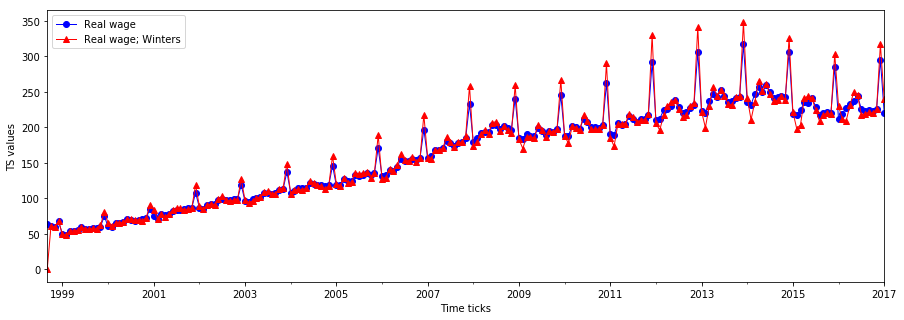

In [173]:
import ast
ts = wage.loc['1998-09-01':'2017-01-01']
params = ast.literal_eval(QualityStr.columns[0])
frc = pd.DataFrame(Theil_Wage(ts['Real wage'], 1, params),\
                            columns = [''], index = ts.index)
plotTSForecast(ts, frc, ts_num=0, alg_title='Winters')

In [174]:
frc.columns = ts.columns
qualityMACAPE(ts.loc['2015-02-01':'2017-01-01'], frc.loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.038204
dtype: float64

Эта модель лучше, чем первая, но хуже, чем вторая

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

In [175]:
# Winters Model with Linear Trend
def Non_add(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = np.zeros(T)
    
    l = x[0]
    b = 0
    s = np.array([np.NaN for i in range(p)])
    
    for cntr in np.arange(1,T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[cntr] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr] / (l + b)
            
            e_t = x[cntr] / s[cntr%p] - b - l
            l = l + b + alpha*e_t
            b = b + alpha*beta*e_t
            s[cntr % p] = s[cntr % p] + gamma*(1-alpha)*e_t*s[cntr % p]/l
            
        FORECAST[cntr] = (l + b) * s[(cntr)%p]
    return FORECAST

In [176]:
ts = wage.loc['1998-09-01':'2015-01-01']
WParams = [{'alpha':alpha, 'beta': beta, 'gamma':delta, 'seasonality_period':12 } for alpha in ALPHA for delta in DELTA for beta in BETA]

In [177]:
QualityStr = pd.DataFrame(index = ts.columns, columns =[str(i) for i in WParams])

ix = ts.index

for param_cntr in WParams:
    frc_wage = pd.DataFrame(Non_add(ts['Real wage'], 1, param_cntr),\
                            columns = ts.columns, index = ix)
    
    QualityStr[str(param_cntr)],_ = qualityMACAPE(ts, frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

{'alpha': 0.35, 'beta': 0.7, 'gamma': 0.7, 'seasonality_period': 12}      -14.813638
{'alpha': 0.4, 'beta': 0.7, 'gamma': 0.9, 'seasonality_period': 12}        -1.247904
{'alpha': 0.4, 'beta': 0.9, 'gamma': 0.7, 'seasonality_period': 12}        -0.276456
{'alpha': 0.4, 'beta': 0.5, 'gamma': 0.9, 'seasonality_period': 12}         0.008058
{'alpha': 0.35, 'beta': 0.9, 'gamma': 0.9, 'seasonality_period': 12}        0.009845
{'alpha': 0.2, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}        0.012936
{'alpha': 0.15, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}       0.012941
{'alpha': 0.35, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}       0.013167
{'alpha': 0.1, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}        0.013235
{'alpha': 0.4, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}        0.013243
{'alpha': 0.5, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 12}        0.013350
{'alpha': 0.7, 'beta': 0.01, 'gamma': 0.9, 'seasonality_period': 

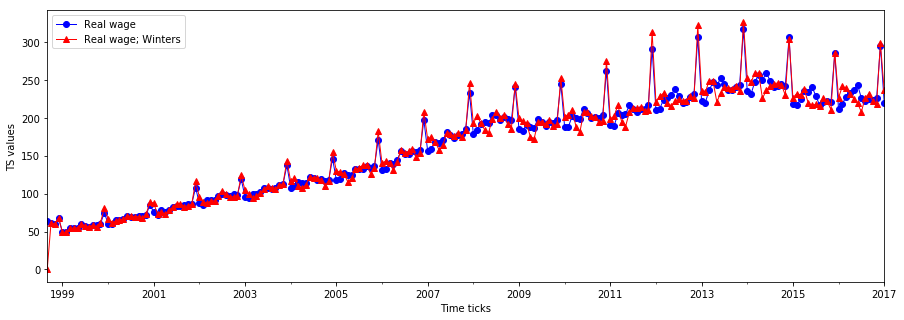

In [178]:
import ast
ts = wage.loc['1998-09-01':'2017-01-01']
params = ast.literal_eval(QualityStr.columns[0])
frc = pd.DataFrame(Non_add(ts['Real wage'], 1, params),\
                            columns = [''], index = ts.index)
plotTSForecast(ts, frc, ts_num=0, alg_title='Winters')

In [180]:
frc.columns = ts.columns
qualityMACAPE(ts.loc['2015-02-01':'2017-01-01'], frc.loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.043286
dtype: float64

Эта модель лучше, чем первая, но хуже двух остальные, из графика (особенно в конце) видно, что она более нестабильная, чем аддитивные модели.

Лучше всего оказалась вторая модель.